# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
# %pip install --upgrade plotly

### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape, df_data.columns

((4324, 9),
 Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
        'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
       dtype='object'))

In [7]:
df_data.head(3)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [8]:
df_data = df_data.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
df_data.tail(3)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [9]:
df_data_no_nan = df_data.dropna()

In [10]:
s = df_data.duplicated(subset=['Detail']).value_counts()


In [11]:
duplicate = df_data[df_data.duplicated()]
duplicate

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


In [12]:
df_data[df_data['Detail'] == 'Long March 2D | Shiyan-3 & Chuangxin-1(02)']

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
792,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success
793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


In [13]:
df_data_no_duplicates = df_data.drop_duplicates(keep='first')
df_data_no_duplicates

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [14]:
df_data_no_duplicates[df_data_no_duplicates['Detail'] == 'Long March 2D | Shiyan-3 & Chuangxin-1(02)']

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
792,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


In [15]:
df_data = df_data_no_duplicates

In [16]:
df_data.shape

(4323, 7)

## Descriptive Statistics

In [17]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4323,4323,4323,4323,4323,963,4323
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3878


In [18]:
df_data[df_data['Date'] == 'Sun Aug 25, 1991 08:40 UTC']

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1736,MHI,"LA-Y1, Tanegashima Space Center, Japan","Sun Aug 25, 1991 08:40 UTC",H-I UM-129A (9SO) | BS-3B,StatusRetired,NaN,Success
1737,MHI,"SLC-N, Tanegashima Space Center, Japan","Sun Aug 25, 1991 08:40 UTC",H-I (9 SO) | BS-3B (Yuri-3B),StatusRetired,NaN,Success


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [19]:
organisations = df_data.groupby(by=['Organisation'], as_index=False).agg({'Detail':pd.Series.count})
organisations.sort_values(by='Detail', inplace=True)
# organisations

In [20]:
h_bar = px.bar(width=800, height=1000,
               x=organisations['Detail'],
               y=organisations['Organisation'],
               orientation='h',
               color=organisations['Detail'],
               color_continuous_scale='sunset',
               title='Number of Missions by Organisation')

h_bar.update_layout(xaxis_title='Number of Missions',
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)
h_bar.show()

In [21]:
#top 20 Organisations
top_20_org = organisations[-20:]
fig= px.pie(top_20_org, values='Detail', names='Organisation', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [22]:
ussr = df_data[df_data['Organisation']=='RVSN USSR']
ussr

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1299,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia","Wed Aug 12, 1998 12:53 UTC",Molniya-M /Block ML | Molniya-1 n†­133,StatusRetired,NaN,Success
1427,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Thu Aug 29, 1996 05:22 UTC","Molniya-M /Block SO-L | Interbol 2, Magion5 & ...",StatusRetired,NaN,Success
1497,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Wed Aug 02, 1995 23:59 UTC",Molniya-M /Block SO-L | Interbol 1 & Magion 4,StatusRetired,NaN,Success
1689,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia","Mon Jul 13, 1992 17:41 UTC",Tsyklon-3 | Cosmos 2197 to 2202,StatusRetired,NaN,Success
1691,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Wed Jul 08, 1992 09:53 UTC",Molniya-M /Block 2BL | Cosmos 2196,StatusRetired,NaN,Success
...,...,...,...,...,...,...,...
4301,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Tue Sep 23, 1958 07:40 UTC",Vostok | E-1 n†­1 (Luna-1),StatusRetired,NaN,Failure
4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Thu May 15, 1958 07:12 UTC",Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Apr 27, 1958 09:01 UTC",Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [23]:
missions = ussr['Mission_Status'].value_counts()

ussr_bar = px.bar(width=600, height=600,
                  x=missions.index, 
                  y=missions.values,
                  color=missions.values,              
                  title='RVSN USSR Mision Status',
                  color_continuous_scale='Aggrnyl')
ussr_bar.update_layout(xaxis_title='Status',
                    yaxis_title='Number of Missions',
                    coloraxis_showscale=True)
ussr_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [24]:
rockets = df_data['Rocket_Status'].value_counts()
rockets

StatusRetired    3534
StatusActive      789
Name: Rocket_Status, dtype: int64

In [25]:
rockets_bar = px.bar(width=600, height=600,
                  x=rockets.index, 
                  y=rockets.values,
                  color=rockets.values,              
                  title='Rockets Status',
                  color_continuous_scale='Bluyl_r')
rockets_bar.update_layout(xaxis_title='Status',
                    yaxis_title='Number of Rockets',
                    coloraxis_showscale=True)
rockets_bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [26]:
all_missions = df_data['Mission_Status'].value_counts()

all_missions_bar = px.bar(width=600, height=600,
                  x=all_missions.index, 
                  y=all_missions.values,
                  color=all_missions.values,              
                  title='Mision Status',
                  color_continuous_scale='Burgyl')
all_missions_bar.update_layout(xaxis_title='Status',
                    yaxis_title='Number of Missions',
                    coloraxis_showscale=True)
all_missions_bar.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [27]:
df_data_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    964 non-null    object
 1   Location        964 non-null    object
 2   Date            964 non-null    object
 3   Detail          964 non-null    object
 4   Rocket_Status   964 non-null    object
 5   Price           964 non-null    object
 6   Mission_Status  964 non-null    object
dtypes: object(7)
memory usage: 60.2+ KB


In [28]:
df_data_no_nan['Price'] = df_data_no_nan['Price'].str.replace(',','')
df_data_no_nan['Price']= pd.to_numeric(df_data_no_nan['Price'])
# df_data['Price'] = df_data['Price'].str.replace(',','')
# df_data['Price']= pd.to_numeric(df_data['Price'])

In [29]:
df_data_no_nan['Price'].describe()

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max     5,000.00
Name: Price, dtype: float64

c:\Users\Martyna\miniconda3\envs\M\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



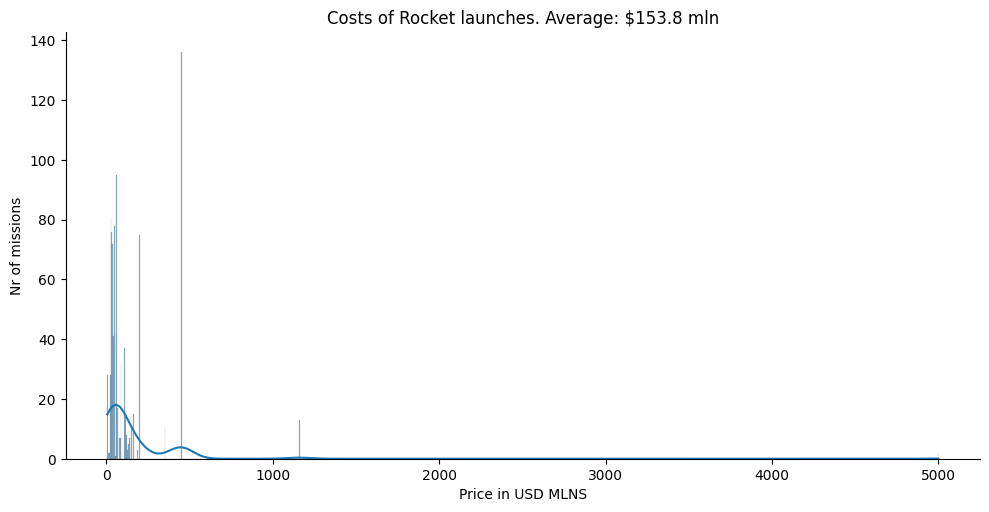

In [30]:
# price_hist = px.histogram(df_data_no_nan['Price'], nbins=1000)
# price_hist.show()

sns.displot(df_data_no_nan['Price'], kde = True, aspect = 2,bins=1000 )
plt.title(f'Costs of Rocket launches. Average: ${(df_data_no_nan["Price"].mean()):.4} mln')
plt.xlabel('Price in USD MLNS')
plt.ylabel('Nr of missions')
plt.show()

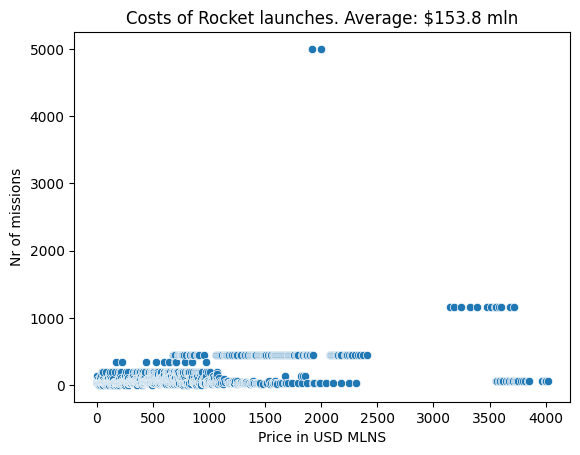

In [31]:
sns.scatterplot(df_data_no_nan['Price'])
plt.title(f'Costs of Rocket launches. Average: ${(df_data_no_nan["Price"].mean()):.4} mln')
plt.xlabel('Price in USD MLNS')
plt.ylabel('Nr of missions')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [32]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [33]:
# for loop method
# Country = []
# for country in df_data['Location']:
#     country_name = country.split(',')[-1]
#     # print(country_name)
#     Country.append(country_name)
# # print(Country)
# df_data['Country'] = Country

#list comprehension
df_data['Country']=[country.split(',')[-1] for country in df_data['Location']]


#definition
# def extract_country(location):
#     return location.split(',')[-1]

# apply() method
# df_data['Country2'] = df_data['Location'].apply(lambda location: location.split(',')[-1]) 
# df_data.drop(columns=['Country2'], inplace=True)
# df_data.tail(10)

In [34]:
df_data['Country'].unique()

array([' USA', ' China', ' Kazakhstan', ' Japan', ' Israel',
       ' New Zealand', ' Russia', ' Shahrud Missile Test Site', ' France',
       ' Iran', ' India', ' New Mexico', ' Yellow Sea', ' North Korea',
       ' Pacific Missile Range Facility', ' Pacific Ocean',
       ' South Korea', ' Barents Sea', ' Brazil', ' Gran Canaria',
       ' Kenya', ' Australia'], dtype=object)

In [35]:
testing_df = df_data.copy()

In [36]:
# df_data.head(30)

In [37]:
df_data['Country'].replace(to_replace=[' USA',' China', ' Kazakhstan', ' Japan', ' Israel',' New Zealand', ' Russia', 
                                       ' Shahrud Missile Test Site', ' France',
                                        ' Iran', ' India', ' New Mexico', ' Yellow Sea', ' North Korea',
                                        ' Pacific Missile Range Facility', ' Pacific Ocean',
                                        ' South Korea', ' Barents Sea', ' Brazil', ' Gran Canaria',
                                        ' Kenya', ' Australia'], 
                              value=['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand', 'Russian Federation',
                                     'Iran', 'France',
                                     'Iran', 'India', 'USA', 'China', 'North Korea',
                                     'USA', 'USA',
                                     'South Korea', 'Russian Federation', 'Brazil', 'USA',
                                     'Kenya', 'Australia'], 
                              inplace=True)


In [38]:
testing_df.query('Country == "Russian Federation"')

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country


In [39]:
df_data.query('Country == "USA"')

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,USA
10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA","Wed Jul 15, 2020 13:46 UTC",Minotaur IV | NROL-129,StatusActive,46.0,Success,USA
...,...,...,...,...,...,...,...,...
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Mon Mar 17, 1958 12:15 UTC",Vanguard | Vanguard 1,StatusRetired,NaN,Success,USA
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Wed Mar 05, 1958 18:27 UTC",Juno I | Explorer 2,StatusRetired,NaN,Failure,USA
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA


In [40]:
testing2_df=df_data.copy()

In [42]:
import iso3166
# x = iso3166.countries_by_name.get("IRAN")
# print(x)


def get_country_ISO(country_name):
    if country_name.upper() in iso3166.countries_by_name:
        return iso3166.countries_by_name[country_name.upper()].alpha3
    else:
        for k,v in iso3166.countries_by_name.items(): 
            if country_name.upper() in k:
                return v.alpha3
            elif country_name == v.alpha3:
                return country_name
            elif country_name == "North Korea":
                return "PRK"
            elif country_name == "South Korea":
                return "KOR"

In [ ]:
iso3166.countries_by_name

In [44]:
df_data['ISO'] = [get_country_ISO(c) for c in df_data["Country"]]


In [45]:
df_data['ISO'].unique()

array(['USA', 'CHN', 'KAZ', 'JPN', 'ISR', 'NZL', 'RUS', 'IRN', 'FRA',
       'IND', 'PRK', 'KOR', 'BRA', 'KEN', 'AUS'], dtype=object)

In [46]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA


# Use a Choropleth Map to Show the Number of Failures by Country


In [47]:
failures = df_data.query('Mission_Status == "Failure"')
failures_by_country = failures.groupby(by=['ISO'], as_index=False).agg({'Detail':pd.Series.count})
failures_by_country.sort_values(by='Detail', inplace=True)

In [48]:
fig= px.choropleth(failures_by_country, locations='ISO',color='Detail')
fig.show()

In [49]:
#show successes by country
success = df_data.query('Mission_Status == "Success"')
success_by_country = success.groupby(by=['ISO'], as_index=False).agg({'Detail':pd.Series.count})
success_by_country.sort_values(by='Detail', inplace=True)
fig= px.choropleth(success_by_country, locations='ISO',color='Detail')
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [50]:
fig = px.sunburst(
    df_data,
    path=['Country', 'Organisation','Mission_Status'],
    color_discrete_sequence= px.colors.sequential.Plasma,
    title= 'Mission Status for each Organisation and country')
fig.show()

In [51]:
detail_list = df_data['Detail'].to_list()

In [52]:
detail_string = ' '.join(detail_list) 
detail_single_words= detail_string.split(' ')


In [53]:
detail_single_words

['Falcon',
 '9',
 'Block',
 '5',
 '|',
 'Starlink',
 'V1',
 'L9',
 '&',
 'BlackSky',
 'Long',
 'March',
 '2D',
 '|',
 'Gaofen-9',
 '04',
 '&',
 'Q-SAT',
 'Starship',
 'Prototype',
 '|',
 '150',
 'Meter',
 'Hop',
 'Proton-M/Briz-M',
 '|',
 'Ekspress-80',
 '&',
 'Ekspress-103',
 'Atlas',
 'V',
 '541',
 '|',
 'Perseverance',
 'Long',
 'March',
 '4B',
 '|',
 'Ziyuan-3',
 '03,',
 'Apocalypse-10',
 '&',
 'NJU-HKU',
 '1',
 'Soyuz',
 '2.1a',
 '|',
 'Progress',
 'MS-15',
 'Long',
 'March',
 '5',
 '|',
 'Tianwen-1',
 'Falcon',
 '9',
 'Block',
 '5',
 '|',
 'ANASIS-II',
 'H-IIA',
 '202',
 '|',
 'Hope',
 'Mars',
 'Mission',
 'Minotaur',
 'IV',
 '|',
 'NROL-129',
 'Kuaizhou',
 '11',
 '|',
 'Jilin-1',
 '02E,',
 'CentiSpace-1',
 'S2',
 'Long',
 'March',
 '3B/E',
 '|',
 'Apstar-6D',
 'Shavit-2',
 '|',
 'Ofek-16',
 'Long',
 'March',
 '2D',
 '|',
 'Shiyan-6',
 '02',
 'Electron/Curie',
 '|',
 'Pics',
 'Or',
 'It',
 'Didn??¦t',
 'Happen',
 'Long',
 'March',
 '4B',
 '|',
 'Gaofen',
 'Duomo',
 '&',
 'BY-02',

In [54]:
import re
p = re.compile("^[a-zA-Z]+$")
filtered_words = [word for word in detail_single_words if p.match(word)]

In [55]:
from collections import Counter
c = Counter(filtered_words)


In [ ]:
c


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [56]:
df_data_no_nan['Organisation']

0             SpaceX
1               CASC
3          Roscosmos
4                ULA
5               CASC
            ...     
3855    US Air Force
3971    US Air Force
3993    US Air Force
4000    US Air Force
4020    US Air Force
Name: Organisation, Length: 964, dtype: object

In [57]:
total_money = df_data_no_nan['Price'].groupby(by=df_data_no_nan['Organisation']).sum()
total_money

Organisation
Arianespace       16,345.00
Boeing             1,241.00
CASC               6,340.26
EER                   20.00
ESA                   37.00
Eurockot             543.40
ExPace                28.30
ILS                1,320.00
ISRO               2,177.00
JAXA                 168.00
Kosmotras            638.00
Lockheed             280.00
MHI                3,532.50
Martin Marietta      721.40
NASA              76,280.00
Northrop           3,930.00
RVSN USSR         10,000.00
Rocket Lab            97.50
Roscosmos          1,187.50
Sandia                15.00
SpaceX             5,444.00
ULA               14,798.00
US Air Force       1,550.92
VKS RF             1,548.90
Virgin Orbit          12.00
Name: Price, dtype: float64

In [66]:
fig = px.bar(total_money, 
             title= 'Total money spent on space missions by organisation')
fig.update_layout(xaxis_title="Organisation", yaxis_title='Money spent (mln $)')
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [68]:
nr_lunches = df_data_no_nan.groupby(by='Organisation').count()
nr_lunches

,Location,Date,Detail,Rocket_Status,Price,Mission_Status
Organisation,,,,,,
Arianespace,96,96,96,96,96,96
Boeing,7,7,7,7,7,7
CASC,158,158,158,158,158,158
EER,1,1,1,1,1,1
ESA,1,1,1,1,1,1
Eurockot,13,13,13,13,13,13
ExPace,1,1,1,1,1,1
ILS,13,13,13,13,13,13
ISRO,67,67,67,67,67,67


In [69]:
cost_of_mission = total_money/nr_lunches['Detail']
cost_of_mission

Organisation
Arianespace         170.26
Boeing              177.29
CASC                 40.13
EER                  20.00
ESA                  37.00
Eurockot             41.80
ExPace               28.30
ILS                 101.54
ISRO                 32.49
JAXA                 56.00
Kosmotras            29.00
Lockheed             35.00
MHI                  95.47
Martin Marietta      80.16
NASA                511.95
Northrop             47.35
RVSN USSR         5,000.00
Rocket Lab            7.50
Roscosmos            51.63
Sandia               15.00
SpaceX               54.99
ULA                 151.00
US Air Force         59.65
VKS RF               46.94
Virgin Orbit         12.00
dtype: float64

In [74]:
bar = px.bar(cost_of_mission ,title='Cost of single launch by Organisation')
bar.update_layout(xaxis_title='Organisation', yaxis_title='Cost (mln $)')
bar.show()

# Chart the Number of Launches per Year

In [83]:
df_data.head(2)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN


In [111]:
# df_again = pd.read_csv('mission_launches.csv')

In [118]:
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True)

In [99]:
from datetime import datetime as dt

In [120]:
df_data['Year'] = df_data['Date'].dt.year

In [121]:
df_data['Month'] = df_data['Date'].dt.month

In [ ]:
df_data.head()

In [ ]:
# [date.year for date in df_data['Date']]

In [130]:
launches_per_year = df_data.groupby(by='Year').count()
launches_per_year

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Month
Year,,,,,,,,,,
1957,3,3,3,3,3,0,3,3,3,3
1958,28,28,28,28,28,0,28,28,28,28
1959,20,20,20,20,20,0,20,20,20,20
1960,39,39,39,39,39,0,39,39,39,39
1961,52,52,52,52,52,0,52,52,52,52
...,...,...,...,...,...,...,...,...,...,...
2016,90,90,90,90,90,64,90,90,90,90
2017,92,92,92,92,92,66,92,92,92,92
2018,117,117,117,117,117,88,117,117,117,117


In [134]:
launches_per_year_fig = px.bar(launches_per_year, x='Detail', color='Detail', height=800, labels={'Detail' : 'Number of Launches'})
launches_per_year_fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [135]:
launches_per_month = df_data.groupby(by='Month').count()
launches_per_month

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Year
Month,,,,,,,,,,
1,268,268,268,268,268,66,268,268,268,268
2,336,336,336,336,336,60,336,336,336,336
3,353,353,353,353,353,77,353,353,353,353
4,383,383,383,383,383,91,383,383,383,383
5,326,326,326,326,326,86,326,326,326,326
6,402,402,402,402,402,85,402,402,402,402
7,351,351,351,351,351,77,351,351,351,351
8,373,373,373,373,373,82,373,373,373,373
9,365,365,365,365,365,88,365,365,365,365


In [136]:
launches_per_month_fig = px.bar(launches_per_month, x='Detail', color='Detail', height=800, labels={'Detail' : 'Number of Launches'})
launches_per_month_fig.show()

In [140]:
month_roling_avg = df_data.set_index('Date')
month_roling_avg=month_roling_avg.rolling(window=6).mean()

C:\Users\Martyna\AppData\Local\Temp\ipykernel_15272\621285916.py:2: FutureWarning:

Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Country', 'Detail', 'ISO', 'Location', 'Mission_Status',
       'Organisation', 'Price', 'Rocket_Status'],
      dtype='object')



In [141]:
month_roling_avg_fig = px.bar(launches_per_month, x='Detail', color='Detail', height=800, labels={'Detail' : 'Number of Launches'})
month_roling_avg_fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [151]:
most_pop_month = launches_per_month.groupby(by='Month').sum()
most_pop_month

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Year
Month,,,,,,,,,,
1,268,268,268,268,268,66,268,268,268,268
2,336,336,336,336,336,60,336,336,336,336
3,353,353,353,353,353,77,353,353,353,353
4,383,383,383,383,383,91,383,383,383,383
5,326,326,326,326,326,86,326,326,326,326
6,402,402,402,402,402,85,402,402,402,402
7,351,351,351,351,351,77,351,351,351,351
8,373,373,373,373,373,82,373,373,373,373
9,365,365,365,365,365,88,365,365,365,365


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [165]:
df_data['Price'] = df_data['Price'].str.replace(',','')
df_data['Price']= pd.to_numeric(df_data['Price'])


Year
1957       0.00
1958       0.00
1959       0.00
1960       0.00
1961       0.00
         ...   
2016   5,085.27
2017   4,586.41
2018   5,697.98
2019   4,351.51
2020   2,945.81
Name: Price, Length: 64, dtype: float64

In [167]:
total_price_per_year = df_data.groupby(by='Year')['Price'].sum()
total_price_per_year

In [170]:
total_launches_per_year = df_data.groupby(by='Year').count()
total_launches_per_year

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Month
Year,,,,,,,,,,
1957,3,3,3,3,3,0,3,3,3,3
1958,28,28,28,28,28,0,28,28,28,28
1959,20,20,20,20,20,0,20,20,20,20
1960,39,39,39,39,39,0,39,39,39,39
1961,52,52,52,52,52,0,52,52,52,52
...,...,...,...,...,...,...,...,...,...,...
2016,90,90,90,90,90,64,90,90,90,90
2017,92,92,92,92,92,66,92,92,92,92
2018,117,117,117,117,117,88,117,117,117,117


In [174]:
avg_price_per_launch = total_price_per_year/total_launches_per_year['Detail']
avg_price_per_launch

Year
1957    0.00
1958    0.00
1959    0.00
1960    0.00
1961    0.00
        ... 
2016   56.50
2017   49.85
2018   48.70
2019   39.92
2020   46.76
Length: 64, dtype: float64

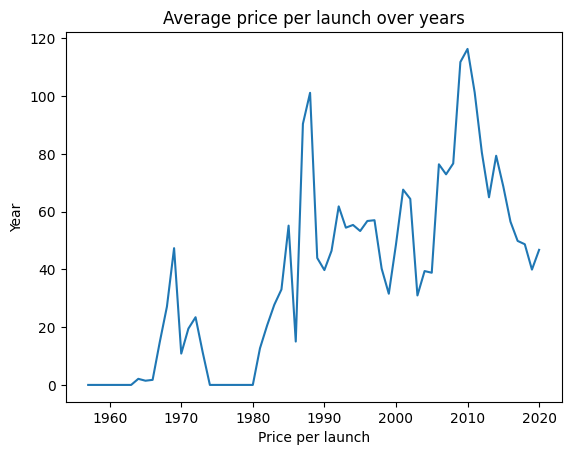

In [178]:
plt.plot(avg_price_per_launch)
plt.title('Average price per launch over years')
plt.xlabel('Price per launch')
plt.ylabel('Year')
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [179]:
top_10_org = organisations[-10:]
fig= px.pie(top_10_org, values='Detail', names='Organisation', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [181]:
top_10_org

,Organisation,Detail
34,Martin Marietta,114
6,Boeing,136
48,ULA,140
49,US Air Force,161
52,VKS RF,201
35,NASA,203
7,CASC,250
17,General Dynamics,251
3,Arianespace,279
40,RVSN USSR,1777


In [183]:
top_10_list = top_10_org['Organisation'].values
top_10_list

array(['Martin Marietta', 'Boeing', 'ULA', 'US Air Force', 'VKS RF',
       'NASA', 'CASC', 'General Dynamics', 'Arianespace', 'RVSN USSR'],
      dtype=object)

In [188]:
df_top_10 = df_data[df_data['Organisation'].isin(top_10_list)]
len(df_data), len(df_top_10)

(4323, 3512)

In [201]:
df_test = df_top_10.groupby(['Year', 'Organisation']).count().reset_index()

df_test

,Year,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO,Month
0,1957,RVSN USSR,2,2,2,2,0,2,2,2,2
1,1958,NASA,2,2,2,2,0,2,2,2,2
2,1958,RVSN USSR,5,5,5,5,0,5,5,5,5
3,1958,US Air Force,2,2,2,2,0,2,2,2,2
4,1959,General Dynamics,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
318,2019,VKS RF,8,8,8,8,5,8,8,8,8
319,2020,Arianespace,4,4,4,4,4,4,4,4,4
320,2020,CASC,19,19,19,19,16,19,19,19,19
321,2020,ULA,4,4,4,4,4,4,4,4,4


In [204]:
px.line(df_test, x='Year', y= 'Detail', color='Organisation')

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 